In [33]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [48]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

In [49]:
X, y = make_regression(n_samples=100)

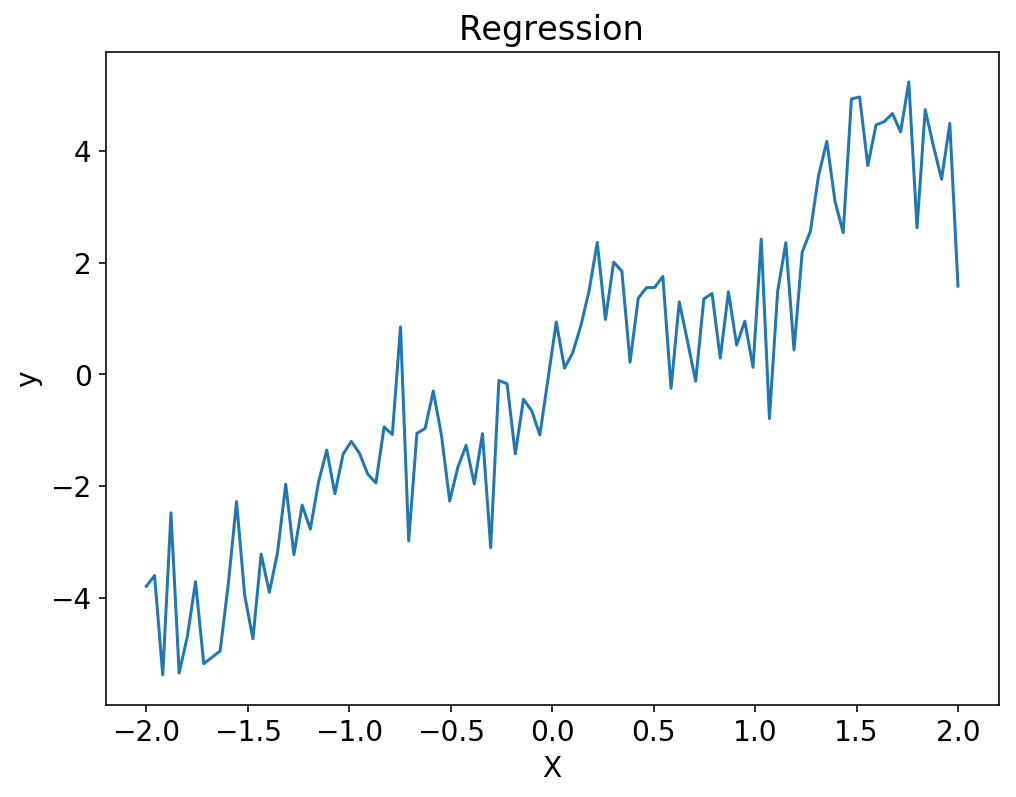

In [50]:
plt.plot(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression')

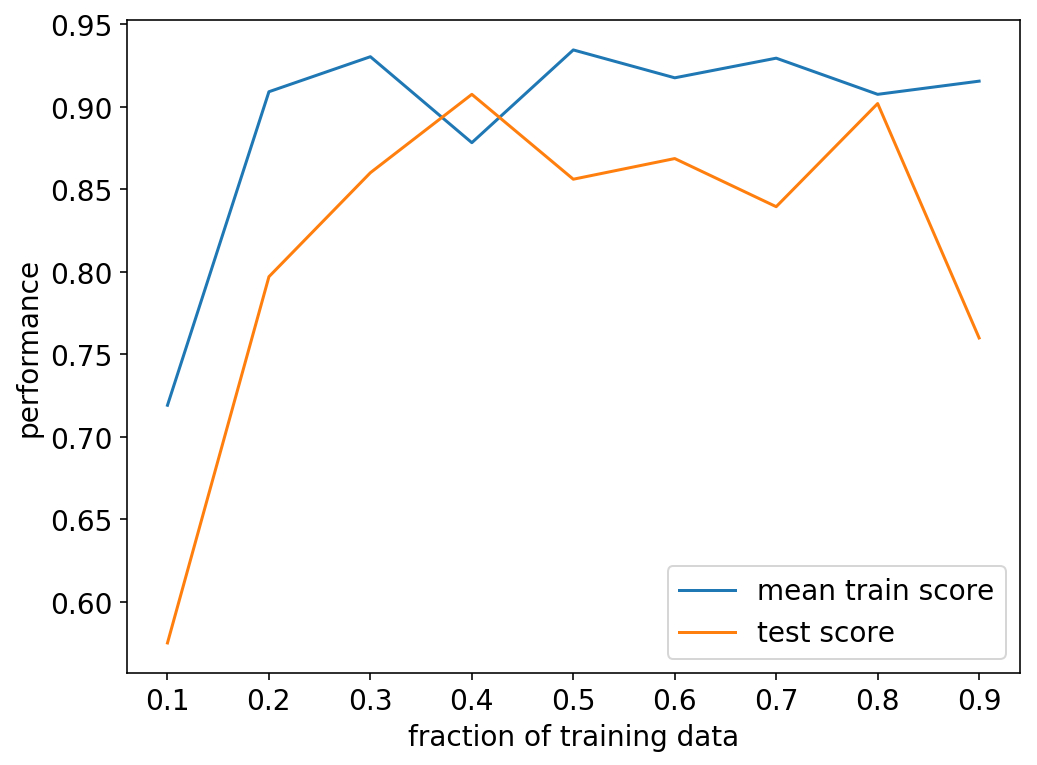

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

train_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#train_size = [0.5]
mean_train_score = []
mean_test_score = []
test_score = []

for ts in train_size:
    
    #first separate data in training and test data
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=ts)
  
    accuracies_test = []
    accuracies_train = []

    train_scores = []
    test_scores = []

    rgr = KNeighborsRegressor(n_neighbors=5)
    rgr.fit(X_train, y_train)
    train_scores.append(rgr.score(X_train, y_train))
    test_scores.append(rgr.score(X_test, y_test))
    
    mean_train_score.append(np.mean(train_scores))
    mean_test_score.append(np.mean(test_scores))
       
plt.plot(train_size, mean_train_score, label='mean train score')
plt.plot(train_size, mean_test_score, label='test score')
plt.xlabel('fraction of training data')
plt.ylabel('performance')
plt.title('')
plt.legend(loc='best')


best split seems to be for fraction of training data = 0.7

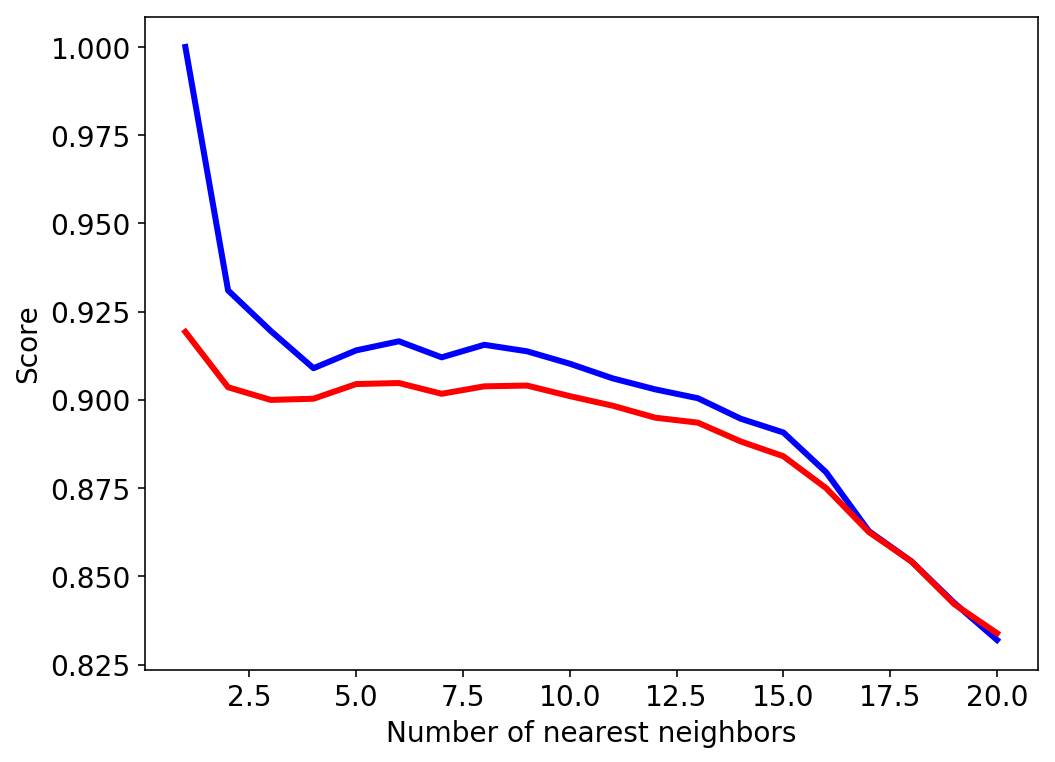

In [55]:
#fix train_size = 0.7 and loop over n_neighbors

X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7)

ks = np.arange(1, 21, 1)

train_scores = []
test_scores = []

accuracies_train = []
accuracies_test = []

for k in ks:
    
    rgr = KNeighborsRegressor(n_neighbors=k)
    rgr.fit(X_train, y_train)
    train_scores.append(rgr.score(X_train, y_train))
    test_scores.append(rgr.score(X, y))

plt.plot(ks, train_scores, c='b', lw=3)
plt.plot(ks, test_scores, c='r', lw=3)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Score') 

In [56]:
#choose best point for nearest neighbors

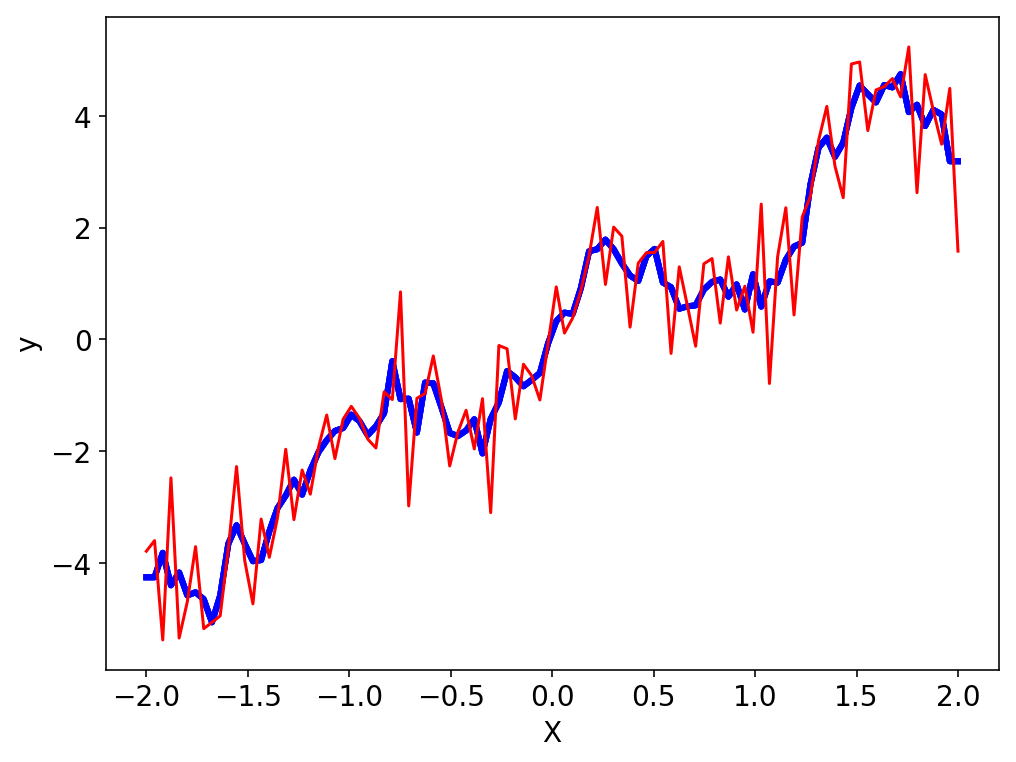

In [59]:
line = np.linspace(-2, 2, 100).reshape(-1, 1)

for n in range(20):
    
    rgr = KNeighborsRegressor(n_neighbors=3)
    rgr.fit(X, y)
    plt.plot(line, rgr.predict(line), '-b', alpha=0.2, label='kNN', lw=3)
    
plt.plot(X,y, '-r', label='data')
plt.xlabel('X')
plt.ylabel('y')
#plt.legend()